# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

#Sampling methods
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

#Feature engineering
import datetime as dt
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn import metrics
import scipy.stats as stats
from scipy.stats import skew

#Ignore warning
import warnings 
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
train_df = pd.read_csv('../data/fraudTrain.csv')

In [3]:
#1296675,22
train_df.shape

(1296675, 23)

In [4]:
train_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [5]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
train_df = train_df.drop(columns=['Unnamed: 0'])

In [7]:
train_df.shape

(1296675, 22)

# EDA

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


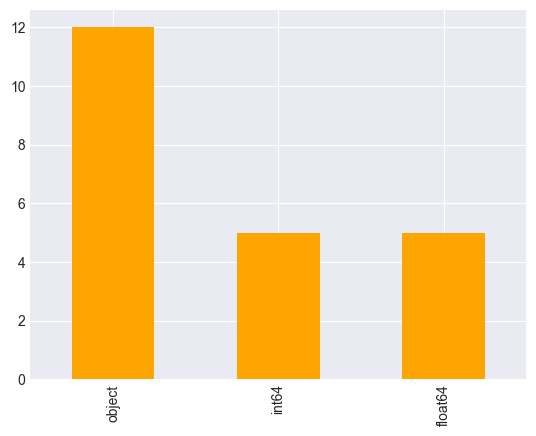

In [9]:
train_df.dtypes.value_counts().plot(kind='bar', color="orange");

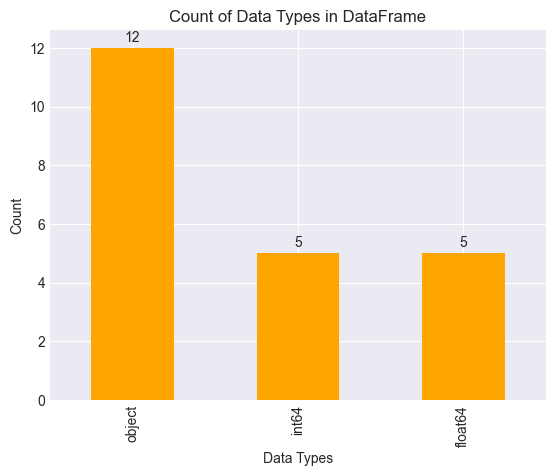

In [10]:
dtype_counts = train_df.dtypes.value_counts()
ax = dtype_counts.plot(kind='bar', color="orange")

# Add text annotations for each bar
for i, count in enumerate(dtype_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.title('Count of Data Types in DataFrame')

# Show the plot
plt.show()

# Univariate Analysis

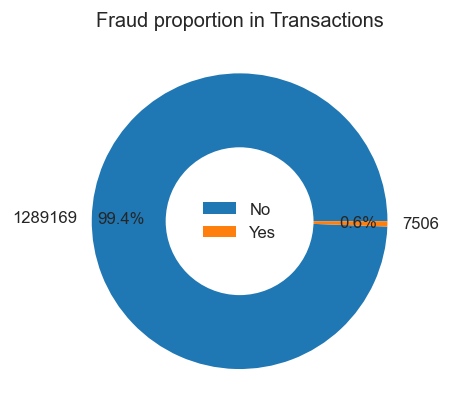

In [11]:
donut = train_df["is_fraud"].value_counts().reset_index()

labels = ["No", "Yes"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["count"],
        labels=donut["count"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Fraud proportion in Transactions")
plt.legend(labels, loc="center", frameon=False)
plt.show();

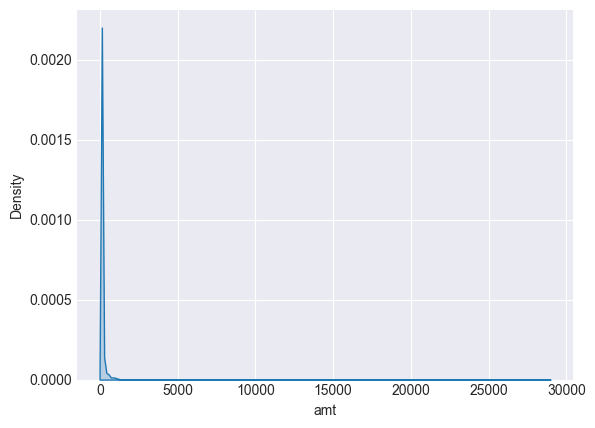

In [12]:
sns.kdeplot(train_df["amt"], fill=True);

<Axes: xlabel='amt', ylabel='Density'>

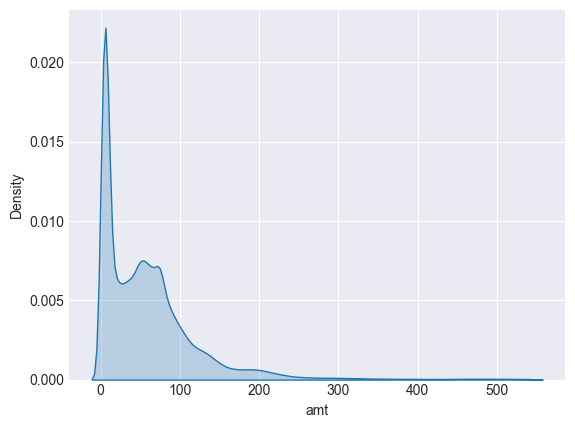

In [13]:
p99 = train_df["amt"].quantile(0.99)
sns.kdeplot(x="amt", data=train_df[train_df["amt"] <= p99], fill=True)

## Multivariate

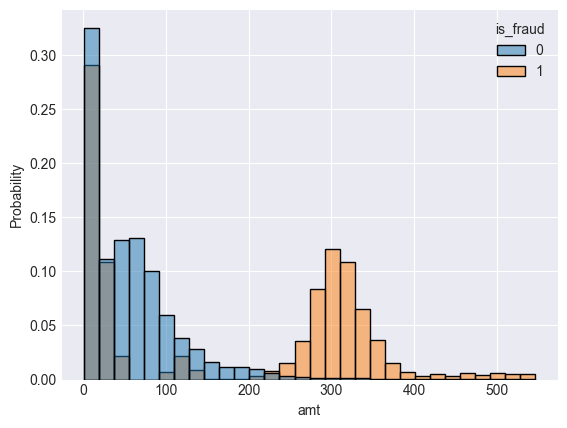

In [14]:
p99 = train_df["amt"].quantile(0.99)
sns.histplot(x="amt", hue="is_fraud", bins=30,
             stat="probability", data=train_df[train_df["amt"] <= p99],
             common_norm=False);

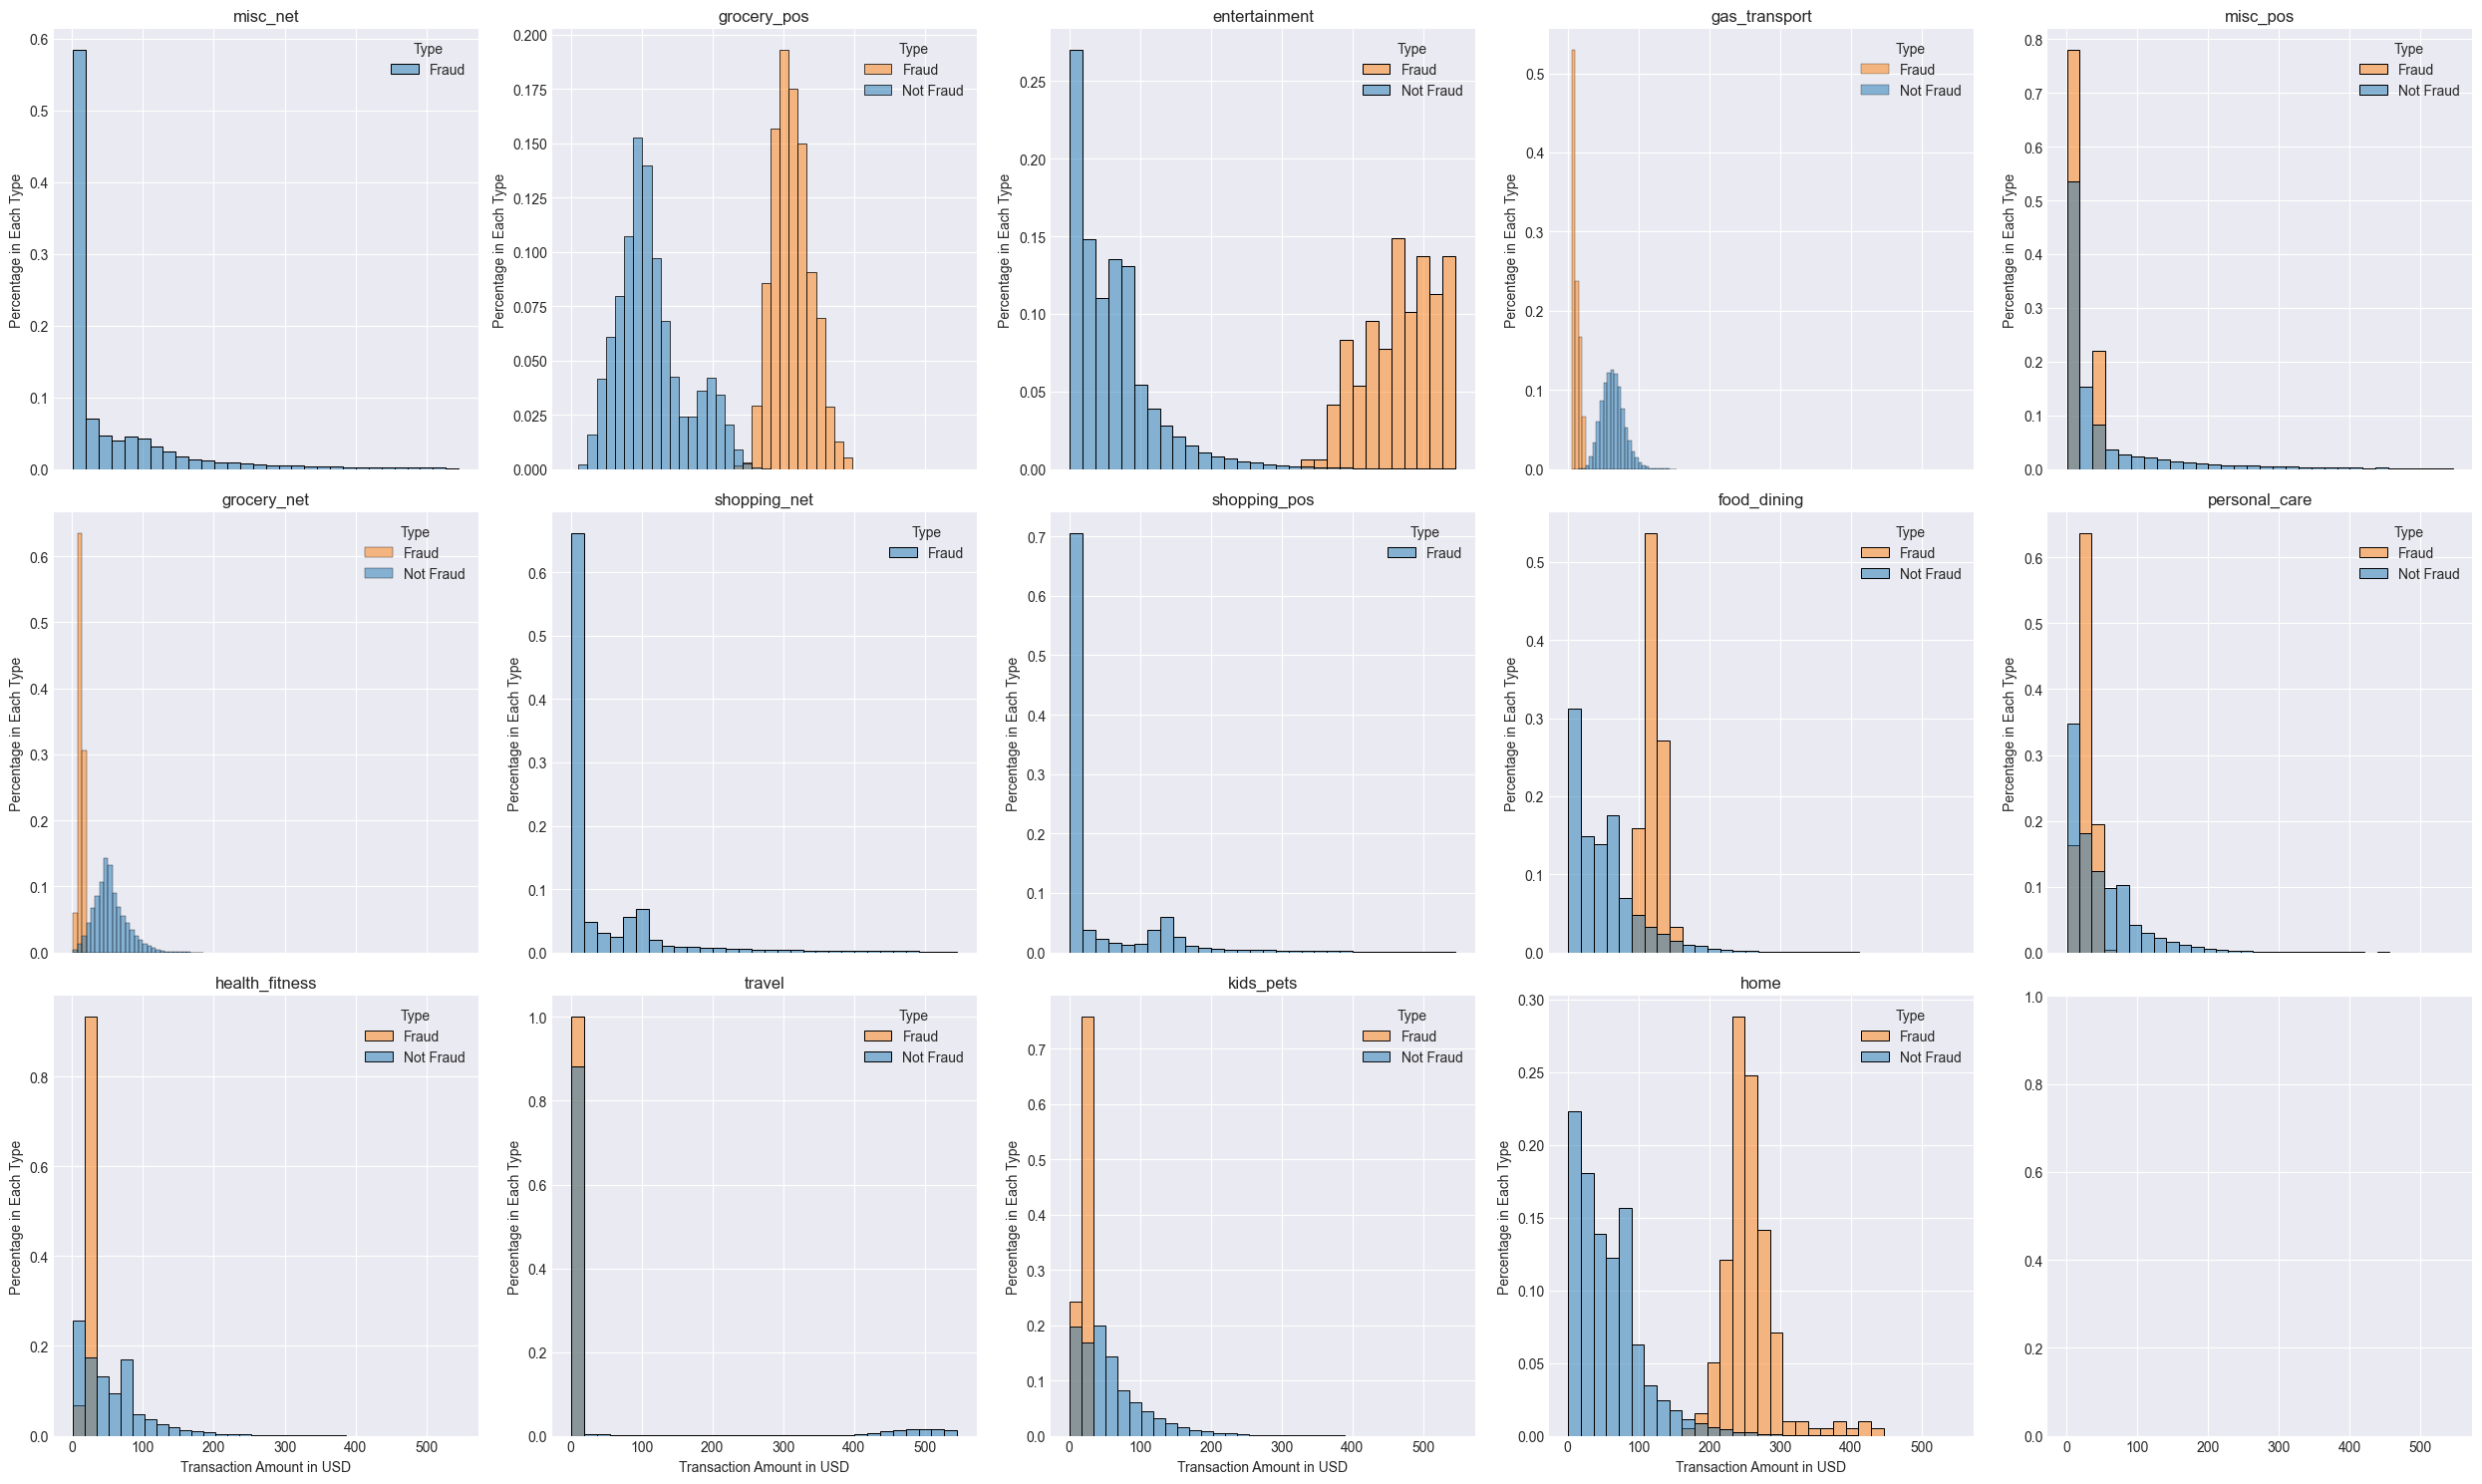

In [15]:
categories = train_df['category'].unique()

num_plots = len(categories)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)

for i, category in enumerate(categories):

    row = i // num_cols
    col = i % num_cols

    data_category = train_df[train_df['category'] == category]

    if num_rows == 1 and num_cols == 1:
        ax = axes
    elif num_rows == 1 or num_cols == 1:
        ax = axes[i]
    else:
        ax = axes[row, col]

    sns.histplot(x='amt', data=data_category[data_category['amt'] <= p99],
                 hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{category}')
    ax.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.tight_layout()

plt.show();

In [16]:
# non_fraud
non_fraud = train_df[train_df['is_fraud'] == 0]['category'].value_counts(
    normalize=True).to_frame().reset_index()
non_fraud.columns = ['category', 'not_fraud_percentual_vs_total']

# fraud
fraud = train_df[train_df['is_fraud'] == 1]['category'].value_counts(
    normalize=True).to_frame().reset_index()
fraud.columns = ['category', 'fraud_percentage_vs_total']

# merging two dataframes and calculating "fraud level"
non_fraud_vs_fraud = non_fraud.merge(fraud, on='category')
non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_percentage_vs_total'] - \
    non_fraud_vs_fraud['not_fraud_percentual_vs_total']

non_fraud_vs_fraud

,category,not_fraud_percentual_vs_total,fraud_percentage_vs_total,fraud_level
0,gas_transport,0.101648,0.082334,-0.019314
1,home,0.095346,0.026379,-0.068967
2,grocery_pos,0.094553,0.232214,0.137661
3,shopping_pos,0.089848,0.112310,0.022462
4,kids_pets,0.087495,0.031841,-0.055654
5,shopping_net,0.074335,0.228217,0.153883
6,entertainment,0.072745,0.031042,-0.041703
7,food_dining,0.070829,0.020117,-0.050711
8,personal_care,0.070230,0.029310,-0.040920
9,health_fitness,0.066513,0.017719,-0.048793


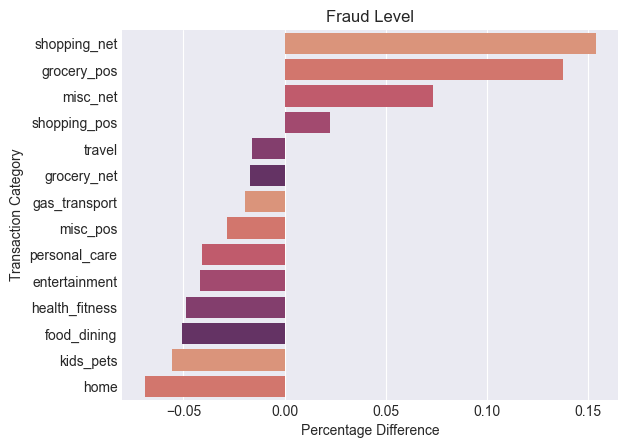

In [17]:
custom_palette = sns.color_palette("flare")
ax = sns.barplot(y='category', x='fraud_level',
                 data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Fraud Level');

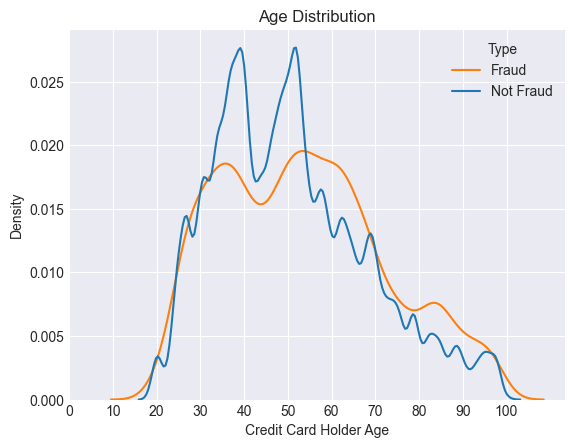

In [18]:
train_df['age'] = dt.date.today().year-pd.to_datetime(train_df['dob']).dt.year
ax = sns.kdeplot(x='age', data=train_df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

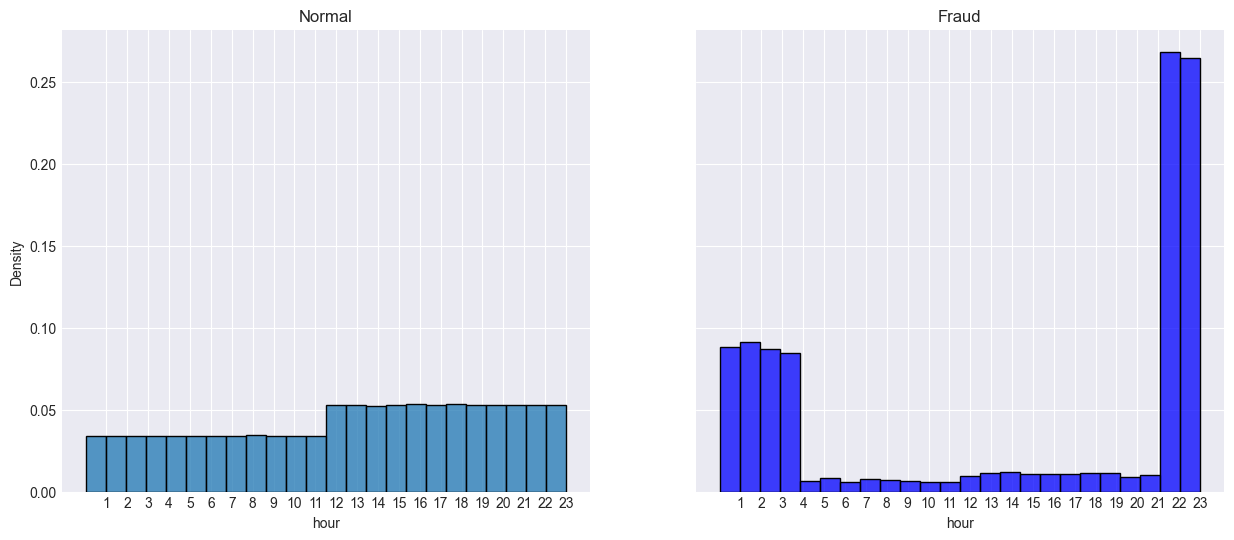

In [19]:
train_df['hour'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='hour', data=train_df[train_df["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1)
ax2 = sns.histplot(x='hour', data=train_df[train_df["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 24))
ax2.set_xticks(np.arange(1, 24));

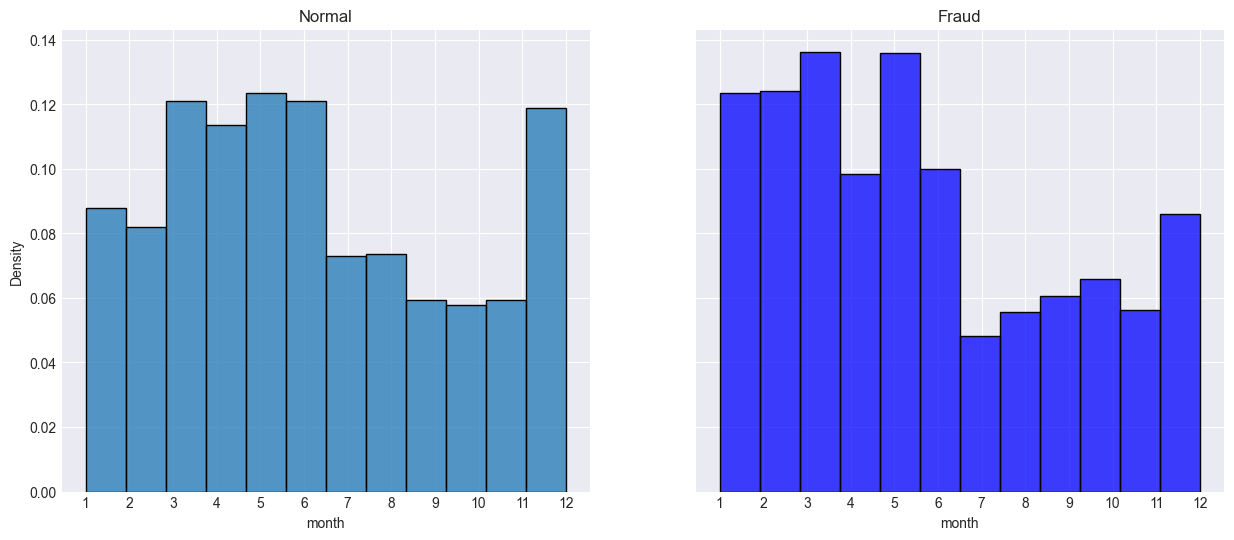

In [20]:
train_df['month'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.month
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='month', data=train_df[train_df["is_fraud"] == 0],
                   stat="density", bins=12, ax=ax1)
ax2 = sns.histplot(x='month', data=train_df[train_df["is_fraud"] == 1],
                   stat="density", bins=12, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 13))
ax2.set_xticks(np.arange(1, 13));

# Data Pre-Proccessing

## Feature engineering

In [21]:
train_df.drop(columns=["merchant", "first", "last", "street",
           "unix_time", "trans_num"], inplace=True)


In [22]:
train_df.head(3)

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,age,hour,month
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,36,0,1
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,46,0,1
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,62,0,1


## Scaling

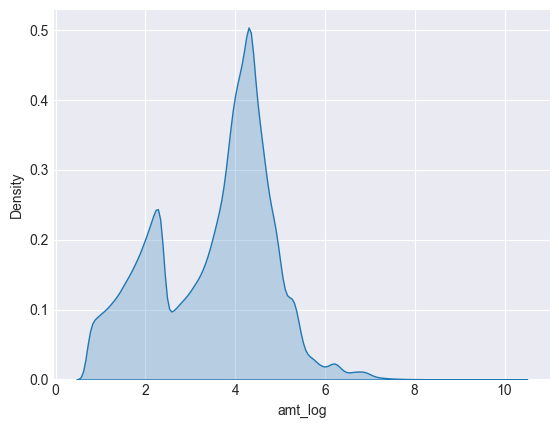

In [23]:
train_df["amt_log"] = np.log1p(train_df["amt"])
sns.kdeplot(train_df["amt_log"], fill=True);

In [24]:
def check_normality(feature):
    plt.figure(figsize=(8, 8))
    ax1 = plt.subplot(1, 1, 1)
    stats.probplot(train_df[feature], dist=stats.norm, plot=ax1)
    ax1.set_title(f'{feature} Q-Q plot', fontsize=20)
    sns.despine()

    mean = train_df[feature].mean()
    std = train_df[feature].std()
    skew = train_df[feature].skew()
    print(f'{feature} : mean: {mean:.2f}, std: {std:.2f}, skew: {skew:.2f}')

amt : mean: 70.35, std: 160.32, skew: 42.28


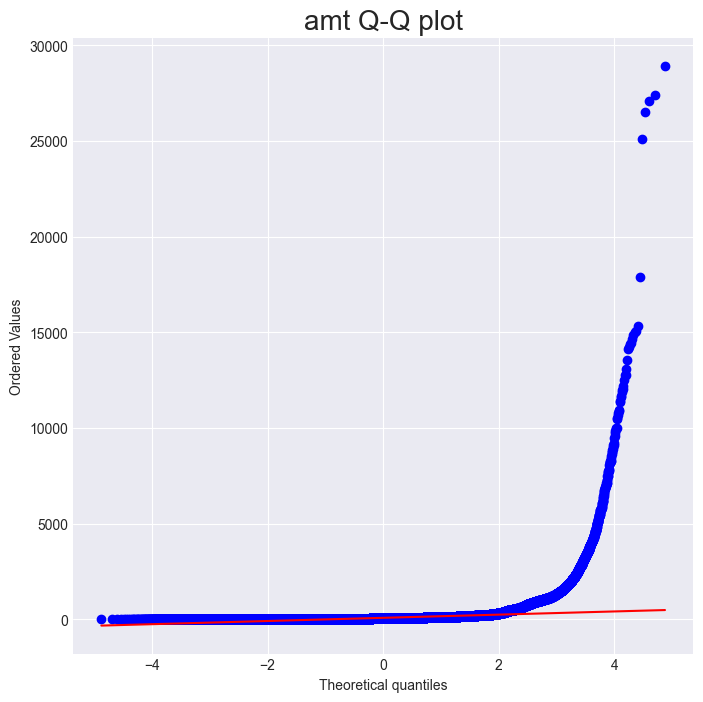

In [25]:
check_normality("amt");

amt_log : mean: 3.53, std: 1.29, skew: -0.30


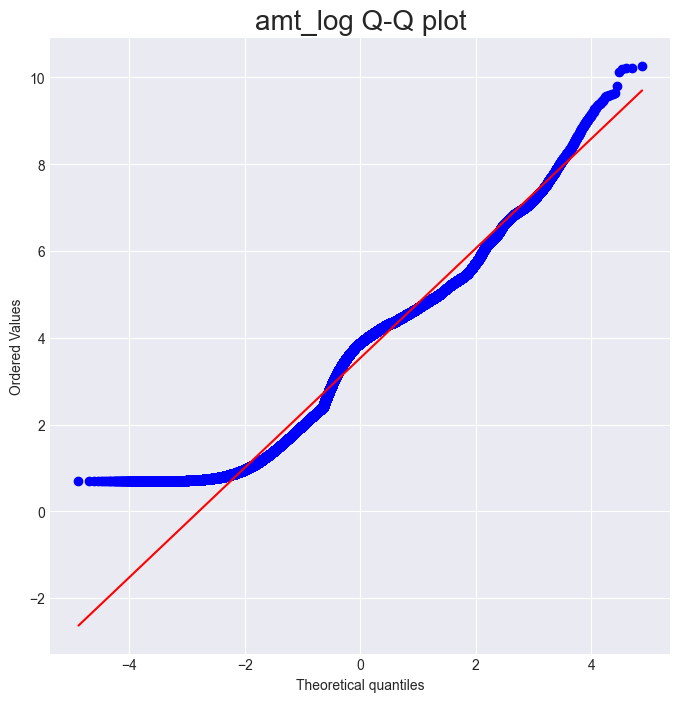

In [26]:
check_normality("amt_log");

## Categorical encoding

In [27]:
def apply_woe(train, columns, target_col):
    woe = ce.WOEEncoder()

    for col in columns:
        X = train[col]
        y = train[target_col]

        new_col_name = f"{col}_WOE"
        train[new_col_name] = woe.fit_transform(X, y)

    return train


columns_to_encode = ["category", "state", "city", "job"]
target_column = "is_fraud"

train_df = apply_woe(train_df, columns_to_encode, target_column)

In [28]:
gender_mapping = {"F": 0, "M": 1}

train_df["gender_binary"] = train_df["gender"].map(gender_mapping)

In [29]:
freq_enc = (train_df.groupby("cc_num").size())
freq_enc.sort_values(ascending=True)
train_df["cc_num_frequency"] = train_df["cc_num"].apply(lambda x: freq_enc[x])

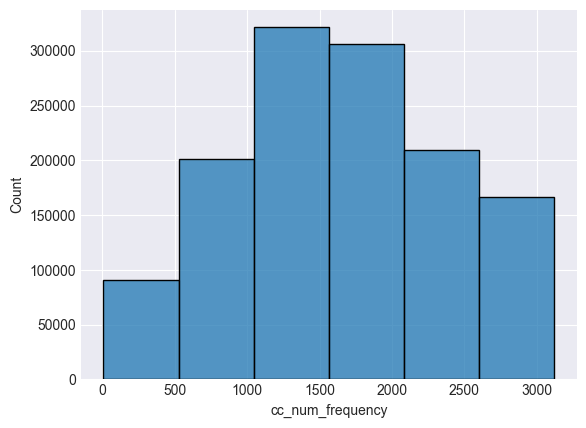

In [30]:
sns.histplot(train_df["cc_num_frequency"], bins=6);

In [31]:
intervals = [600, 1200, 1800, 2400, 3000, 3600]


def classify_frequency(freq):
    for i, c in enumerate(intervals):
        if freq <= c:
            return i


train_df["cc_num_frequency_classification"] = train_df["cc_num_frequency"].apply(
    classify_frequency)

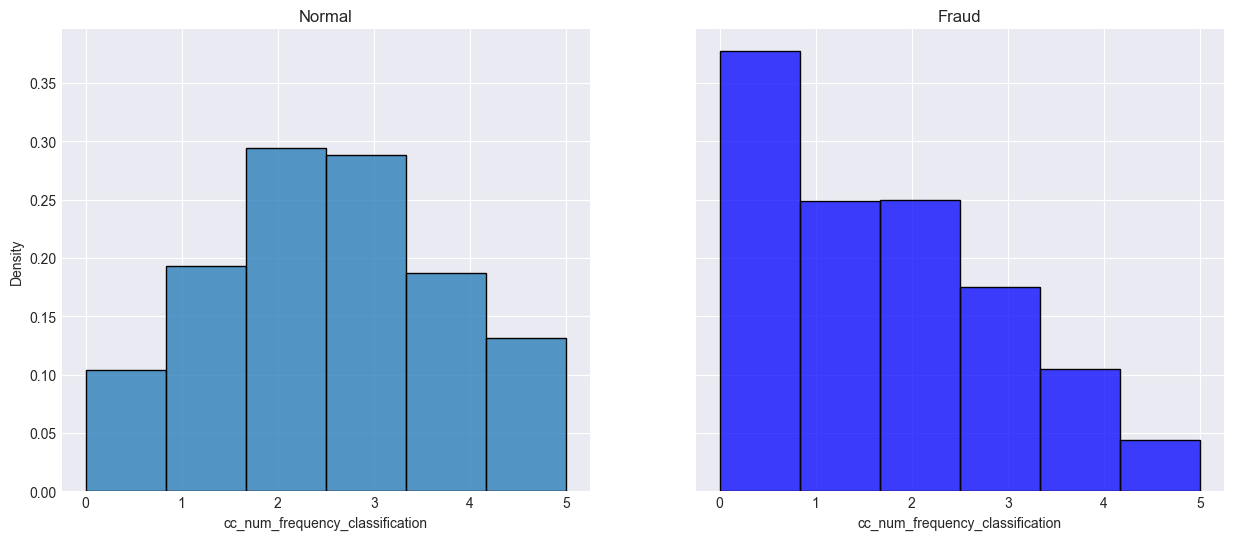

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='cc_num_frequency_classification', data=train_df[train_df["is_fraud"] == 0],
                   stat="density", bins=6, ax=ax1)
ax2 = sns.histplot(x='cc_num_frequency_classification', data=train_df[train_df["is_fraud"] == 1],
                   stat="density", bins=6, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud");

# Random Undersampling

In [33]:
X = train_df.drop(columns=["is_fraud"])
y = train_df["is_fraud"]

In [34]:
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=23)

In [35]:
X_ru, y_ru = rus.fit_resample(X, y)

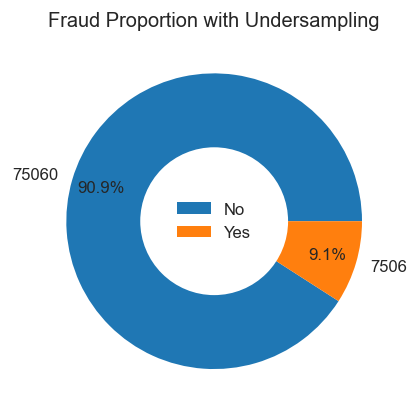

In [36]:
donut = y_ru.value_counts().reset_index()

labels = ["No", "Yes"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["count"],
        labels=donut["count"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Fraud Proportion with Undersampling")
plt.legend(labels, loc="center", frameon=False)
plt.show();

# SOTA

# Feature Importance

In [38]:
X_ru["random_feat_1"] = np.random.randint(
    0, 100, size=len(X_ru))
X_ru["random_feat_2"] = np.random.randint(
    0, 500, size=len(X_ru))

In [39]:
X_train = X_ru.drop(columns=["trans_date_trans_time",
                                       "city", "state", "category", "gender", "dob", "job", "cc_num", "amt"])

y_train = y_ru

In [40]:
X_train.head(3)

,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,month,amt_log,category_WOE,state_WOE,city_WOE,job_WOE,gender_binary,cc_num_frequency,cc_num_frequency_classification,random_feat_1,random_feat_2
118515,77566,29.0393,-95.4401,28739,29.240616,-95.430963,25,5,3,3.888345,-0.209382,-0.135704,0.138686,0.352429,1,2556,4,43,3
598857,12460,42.4069,-74.1528,277,41.558414,-74.093286,53,7,9,4.646120,0.898799,0.140597,0.204793,0.698244,1,1548,2,71,74
59238,98304,46.7531,-121.9898,759,46.604923,-122.183106,68,18,2,2.391511,-0.698428,-0.122657,0.774392,0.113063,0,1040,1,6,305


In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_

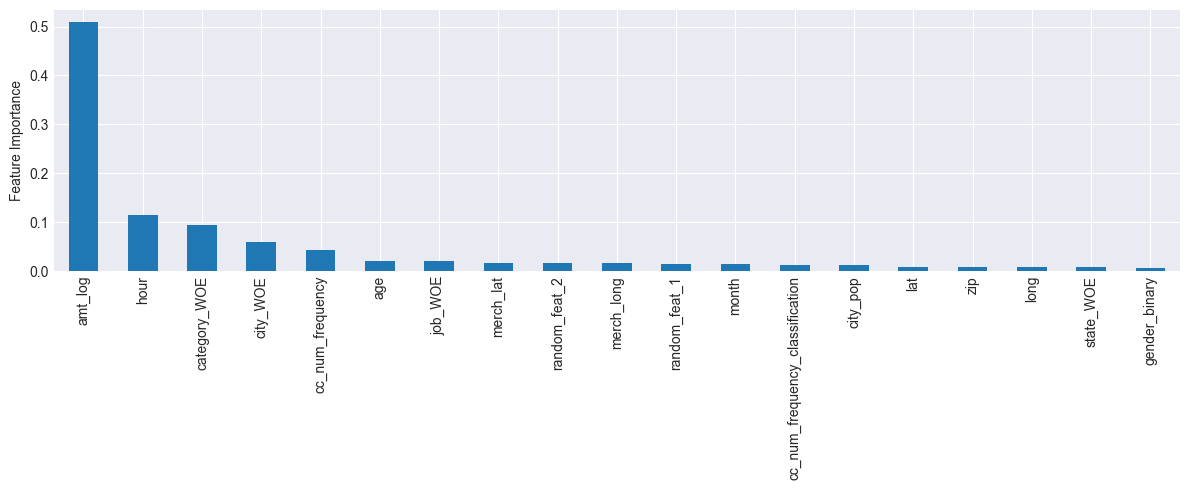

In [42]:
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots(figsize=(12, 5))
forest_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
fig.tight_layout();

In [43]:
selected_columns = ['merch_lat', 'age', 'hour', 'amt_log', 'category_WOE', 'city_WOE', 'job_WOE', 'cc_num_frequency']
X_train_ru = X_train[selected_columns].copy()
X_train_ru.head()

,merch_lat,age,hour,amt_log,category_WOE,city_WOE,job_WOE,cc_num_frequency
118515,29.240616,25,5,3.888345,-0.209382,0.138686,0.352429,2556
598857,41.558414,53,7,4.646120,0.898799,0.204793,0.698244,1548
59238,46.604923,68,18,2.391511,-0.698428,0.774392,0.113063,1040
710180,33.088094,49,5,3.630456,-0.611091,0.002823,-0.231138,1548
6204,48.078338,46,23,1.423108,1.122029,-3.027790,-0.904144,3030


# Importing Test Data

In [44]:
test = pd.read_csv("../data/fraudTest.csv")

In [45]:
#555719
test.shape

(555719, 23)

In [46]:
test['age'] = dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour'] = pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['month'] = pd.to_datetime(test['trans_date_trans_time']).dt.month

test.drop(columns=["merchant", "first", "last", "street",
                   "unix_time", "trans_num"], inplace=True)

test["amt_log"] = np.log1p(test["amt"])

test = apply_woe(test, columns_to_encode, target_column)

test["gender_binary"] = test["gender"].map(gender_mapping)

freq_enc_test = (test.groupby("cc_num").size())
freq_enc_test.sort_values(ascending=True)
test["cc_num_frequency"] = test["cc_num"].apply(lambda x: freq_enc_test[x])
test["cc_num_frequency_classification"] = test["cc_num_frequency"].apply(
    classify_frequency)

X_test = test.drop(columns=["trans_date_trans_time",
                            "city", "state", "category", "gender", "dob", "job", "cc_num", "amt", "is_fraud"])

y_test = test["is_fraud"]

X_test.drop(columns=["gender_binary", "state_WOE", "zip", "long", "lat",
                     "city_pop", "month", "cc_num_frequency_classification", "merch_long"], inplace=True)

In [47]:
def evaluate_model(target, predicted, y_score, model_name, normalize_matrix=None):
    accuracy = metrics.accuracy_score(target, predicted)
    precision = metrics.precision_score(target, predicted)
    recall = metrics.recall_score(target, predicted)
    f1 = f1_score(target, predicted)
    auc = metrics.roc_auc_score(target, y_score)

    confusion_matrix = metrics.confusion_matrix(target, predicted, normalize=normalize_matrix)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.grid(False)
    plt.title('Confusion Matrix for ' + model_name)
    plt.show()

    fpr, tpr, threshold = roc_curve(target, y_score)
    plt.plot(fpr, tpr, label="Model", c="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", c="yellow")
    plt.title("ROC Curve for " + model_name)
    plt.legend()
    plt.show()

    metrics_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'AUC': [auc]
    })

    print(metrics_df)
    return metrics_df

In [48]:
rf_ru = RandomForestClassifier(random_state=23)
rf_sota = RandomForestClassifier(random_state=23)
knn_ru = KNeighborsClassifier()
knn_sota = KNeighborsClassifier()
gboost_ru = GradientBoostingClassifier(random_state=23)
gboost_sota = GradientBoostingClassifier(random_state=23)
svc_ru = SVC()
svc_sota = SVC()
log_reg_ru = LogisticRegression()
log_reg_sota = LogisticRegression()

In [49]:
X_test.drop(columns=['Unnamed: 0'], inplace=True)

In [50]:
X_test.head()

,merch_lat,age,hour,amt_log,category_WOE,city_WOE,job_WOE,cc_num_frequency
0,33.986391,56,12,1.350667,-0.762903,-0.910702,-2.243730,640
1,39.450498,34,12,3.428813,-0.762903,-1.178691,-2.286016,837
2,40.495810,54,12,3.744314,-0.985812,-1.426818,0.472088,1073
3,28.812398,37,12,4.111693,-0.606015,1.467115,1.467115,663
4,44.959148,69,12,1.432701,-0.498900,-1.241139,-1.241139,891


In [51]:
rf_ru.fit(X_train_ru, y_train)


RandomForestClassifier(random_state=23)

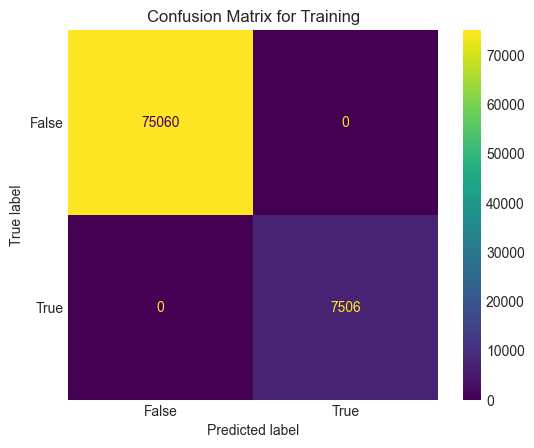

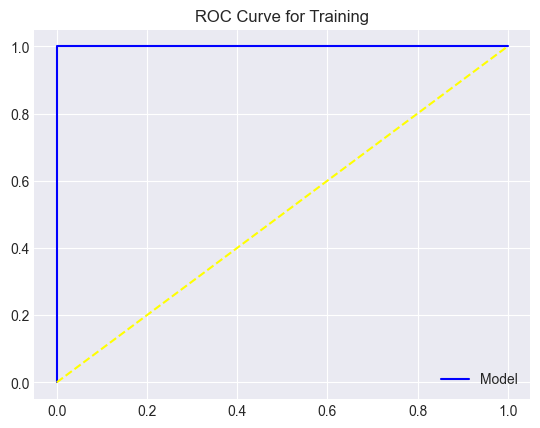

      Model  Accuracy  Precision  Recall  F1 Score  AUC
0  Training       1.0        1.0     1.0       1.0  1.0


In [52]:
y_pred_train = rf_ru.predict(X_train_ru)
y_score_train = rf_ru.predict_proba(X_train_ru)[:,1]
training_metrics = evaluate_model(y_train, y_pred_train, y_score_train, model_name="Training", normalize_matrix=None)

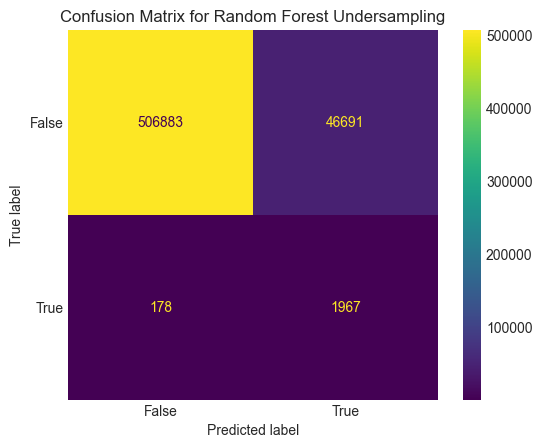

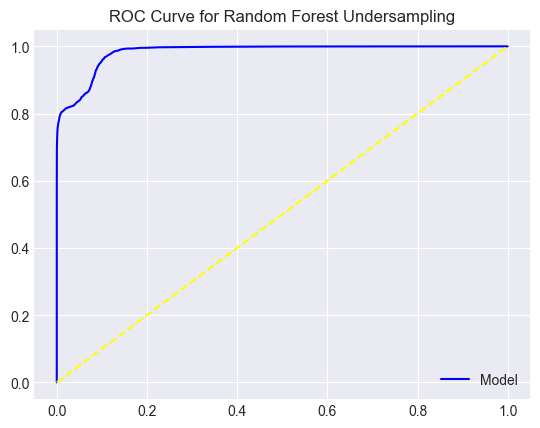

                         Model  Accuracy  Precision    Recall  F1 Score  \
0  Random Forest Undersampling  0.915661   0.040425  0.917016  0.077436   

        AUC  
0  0.983235  


In [53]:
y_pred_test = rf_ru.predict(X_test)
y_score_test = rf_ru.predict_proba(X_test)[:,1]
rf_ru_training_metrics = evaluate_model(y_test, y_pred_test, y_score_test, model_name="Random Forest Undersampling", normalize_matrix=None)

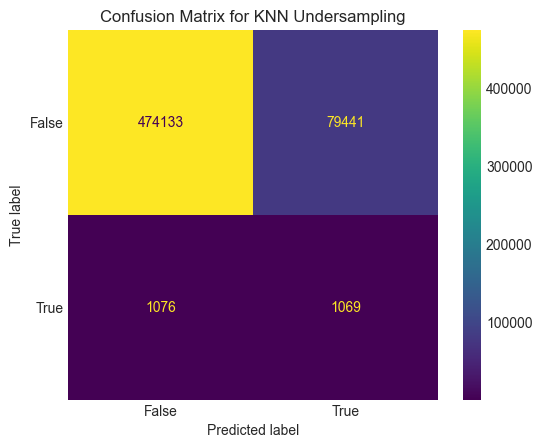

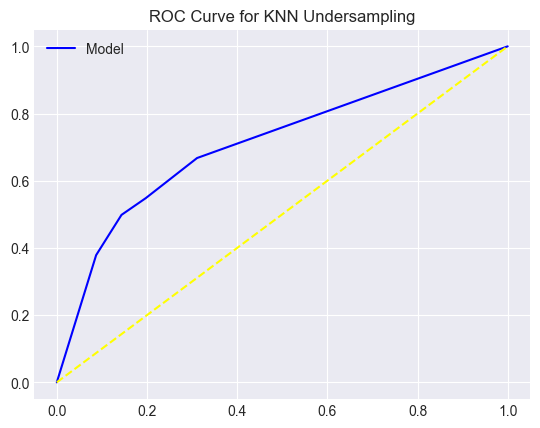

               Model  Accuracy  Precision    Recall  F1 Score       AUC
0  KNN Undersampling  0.855112   0.013278  0.498368  0.025867  0.712907


In [54]:
knn_ru.fit(X_train_ru, y_train)
y_pred_test = knn_ru.predict(X_test)
y_score_test = knn_ru.predict_proba(X_test)[:,1]
knn_ru_training_metrics = evaluate_model(y_test, y_pred_test, y_score_test, model_name="KNN Undersampling", normalize_matrix=None)

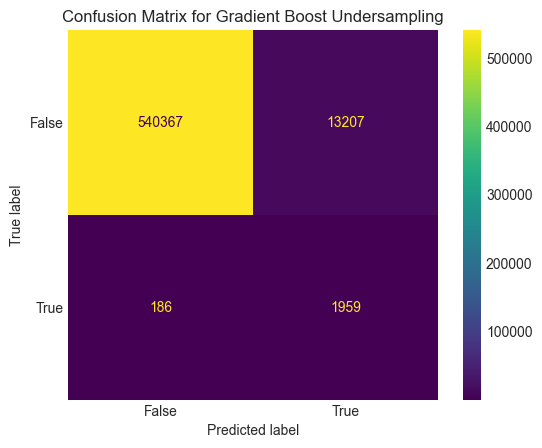

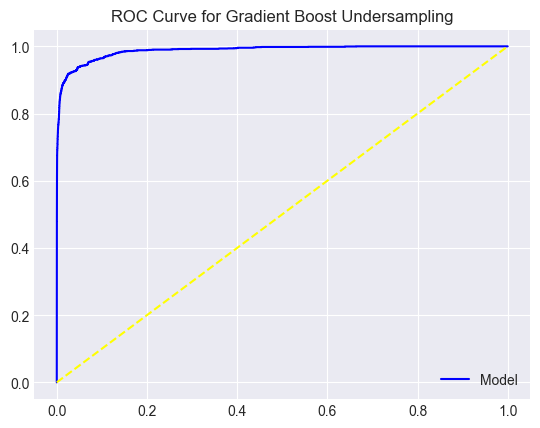

                          Model  Accuracy  Precision    Recall  F1 Score  \
0  Gradient Boost Undersampling    0.9759   0.129171  0.913287   0.22633   

        AUC  
0  0.988052  


In [55]:
gboost_ru.fit(X_train_ru, y_train)
y_pred_test = gboost_ru.predict(X_test)
y_score_test = gboost_ru.predict_proba(X_test)[:,1]
gboost_ru_training_metrics = evaluate_model(y_test, y_pred_test, y_score_test, model_name="Gradient Boost Undersampling", normalize_matrix=None)

In [ ]:
svc_ru.fit(X_train_ru, y_train)
y_pred_test = svc_ru.predict(X_test)
y_score_test = svc_ru.predict_proba(X_test)[:,1]
svm_ru_training_metrics = evaluate_model(y_test, y_pred_test, y_score_test, model_name="SVM Undersampling", normalize_matrix=None)

In [ ]:
#test metrics
evaluate_model(y_test, y_pred_test, y_score_test)

In [56]:
from joblib import dump
dump(rf_ru, "rf_ru.pkl")

['rf_ru.pkl']

In [57]:
dump(knn_ru, "knn_ru.pkl")

['knn_ru.pkl']

In [58]:
dump(gboost_ru, "gboost_ru.pkl")

['gboost_ru.pkl']

In [ ]:
dump(lgbm, "lgbm_model.pkl")